In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = {
    'Fever': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Cough': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'SmellLoss': ['Yes', 'No', 'No', 'No', 'No', 'No', 'No'],
    'Disease': ['COVID', 'Dengue', 'Malaria', 'Dengue', 'Malaria', 'Dengue', 'Malaria']
}

df = pd.DataFrame(data)
df


,Fever,Cough,SmellLoss,Disease
0,Yes,Yes,Yes,COVID
1,Yes,Yes,No,Dengue
2,Yes,No,No,Malaria
3,No,Yes,No,Dengue
4,Yes,No,No,Malaria
5,Yes,Yes,No,Dengue
6,No,No,No,Malaria


In [ ]:
le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

print("\nEncoded Dataset:")
df



Encoded Dataset:


,Fever,Cough,SmellLoss,Disease
0,1,1,1,0
1,1,1,0,1
2,1,0,0,2
3,0,1,0,1
4,1,0,0,2
5,1,1,0,1
6,0,0,0,2


In [ ]:
X = df[['Fever', 'Cough', 'SmellLoss']]  # features
y = df['Disease']                      # class label


,Disease
0,0
1,1
2,2
3,1
4,2
5,1
6,2


In [ ]:
# Split into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)


In [ ]:
# Training Naive Bayes Model:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# MULTI-CLASS classification by using Confusion Matrix
y_pred = model.predict(X_test)

print("\nPredicted values:", y_pred)
print("Actual values   :", y_test.values)



Predicted values: [2 2 1]
Actual values   : [2 2 1]


The data will be like this
| Index | Actual  | Predicted | Mapping |
| ----: | ------- | --------- | ------- |
|     1 | COVID   | COVID     | **TP**  |
|     2 | Dengue  | Dengue    | **TN**  |
|     3 | Malaria | Malaria   | **TN**  |

| Metric | Value |
| ------ | ----- |
| **TP** | 1     |
| **TN** | 2     |
| **FP** | 0     |
| **FN** | 0     |



In [ ]:
y_test, y_pred

(6    2
 2    2
 1    1
 Name: Disease, dtype: int64,
 array([2, 2, 1]))

In [ ]:
#Confusion matrix is used to check how well the Naive Bayes model is working.
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[1 0]
 [0 2]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 1.0


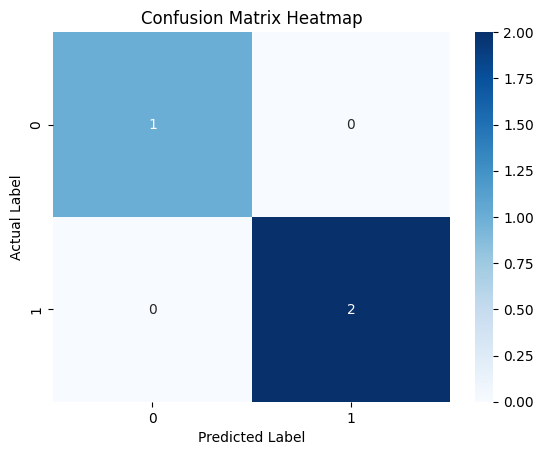

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Heatmap using seaborn
sb.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
# Heatmap using plotly
fig = px.imshow(
    cm,
    text_auto=True,
    color_continuous_scale="Blues",
    labels=dict(x="Predicted Label", y="Actual Label"),
    title="Confusion Matrix Heatmap"
)

fig.show()
